In [1]:
# k-means

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
wine = datasets.load_wine()
X = wine.data[:, [9, 12]]
y = wine.target

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [4]:
model2 = KMeans(n_clusters=2, random_state=103)
model3 = KMeans(n_clusters=3, random_state=103)
model4 = KMeans(n_clusters=4, random_state=103)

model2.fit(X_std)
model3.fit(X_std)
model4.fit(X_std)

KMeans(n_clusters=4, random_state=103)

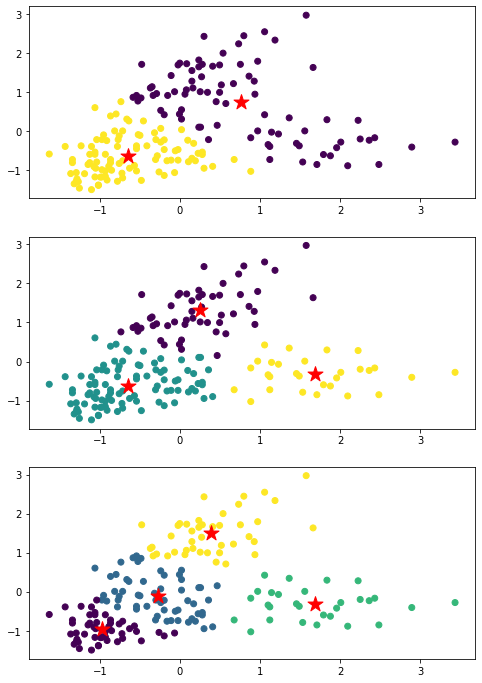

In [8]:
plt.figure(figsize=(8, 12))

plt.subplot(3, 1, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model2.labels_)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=250, marker="*", c="red")

plt.subplot(3, 1, 2)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model3.labels_)
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], s=250, marker="*", c="red")

plt.subplot(3, 1, 3)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model4.labels_)
plt.scatter(model4.cluster_centers_[:, 0], model4.cluster_centers_[:, 1], s=250, marker="*", c="red")

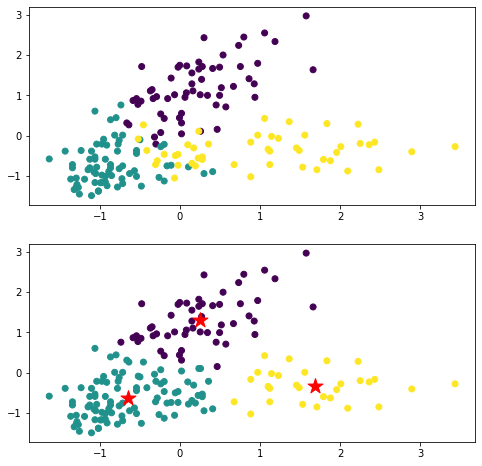

In [9]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y)

plt.subplot(2, 1, 2)
plt.scatter(X_std[:, 0], X_std[:, 1], c=model3.labels_)
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], s=250, marker="*", c="red")

plt.show()

In [10]:
# 混合ガウス分布

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [12]:
model = GaussianMixture(
    n_components=3,
    covariance_type="diag",
    random_state=1
)
model.fit(X_std)

GaussianMixture(covariance_type='diag', n_components=3, random_state=1)

In [13]:
model_ = GaussianMixture(
    n_components=3,
    covariance_type="full",
    random_state=1
)
model_.fit(X_std)

GaussianMixture(n_components=3, random_state=1)

/var/folders/f4/vg8kf0cs5fxcv248s_99x8nw0000gn/T/ipykernel_37887/2412913670.py:11: UserWarning: The following kwargs were not used by contour: 'lavels'
  plt.contour(X, Y, Z, lavels=[0.5, 1, 2, 3, 4, 5])
/var/folders/f4/vg8kf0cs5fxcv248s_99x8nw0000gn/T/ipykernel_37887/2412913670.py:19: UserWarning: The following kwargs were not used by contour: 'lavels'
  plt.contour(X, Y, Z_, lavels=[0.5, 1, 2, 3, 4, 5])


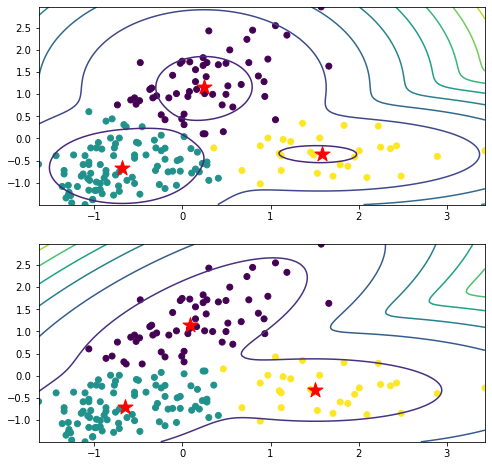

In [23]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
x = np.linspace(X_std[:, 0].min(), X_std[:, 0].max(), 100)
y = np.linspace(X_std[:, 1].min(), X_std[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, lavels=[0.5, 1, 2, 3, 4, 5])
plt.scatter(X_std[:, 0], X_std[:, 1], c=model.predict(X_std))
plt.scatter(model.means_[:, 0], model.means_[:, 1], s=250, marker="*", c="red")

plt.subplot(2, 1, 2)

Z_ = -model_.score_samples(XX)
Z_ = Z_.reshape(X.shape)
plt.contour(X, Y, Z_, lavels=[0.5, 1, 2, 3, 4, 5])
plt.scatter(X_std[:, 0], X_std[:, 1], c=model_.predict(X_std))
plt.scatter(model_.means_[:, 0], model_.means_[:, 1], s=250, marker="*", c="red")

plt.show()

In [24]:
model.weights_

array([0.33382347, 0.50039829, 0.16577824])

In [25]:
model.means_

array([[ 0.24529784,  1.16494852],
       [-0.68692906, -0.65838607],
       [ 1.5795315 , -0.35850242]])

In [26]:
model.covariances_

array([[0.3247152 , 0.51324971],
       [0.24025176, 0.23149423],
       [0.61267547, 0.13016258]])

In [28]:
model_.covariances_

array([[[ 0.3930839 ,  0.3184785 ],
        [ 0.3184785 ,  0.51537395]],

       [[ 0.2722111 ,  0.0899247 ],
        [ 0.0899247 ,  0.1860756 ]],

       [[ 0.62958843, -0.00149391],
        [-0.00149391,  0.15105973]]])

In [29]:
# 変分混合ガウス分布

In [31]:
model_v = BayesianGaussianMixture(
    n_components=10,
    covariance_type="full",
    random_state=6
)
model_v.fit(X_std)

BayesianGaussianMixture(n_components=10, random_state=6)

/var/folders/f4/vg8kf0cs5fxcv248s_99x8nw0000gn/T/ipykernel_37887/3474800908.py:10: UserWarning: The following kwargs were not used by contour: 'lavels'
  plt.contour(X, Y, Z, lavels=[0.5, 1, 2, 3, 4, 5])


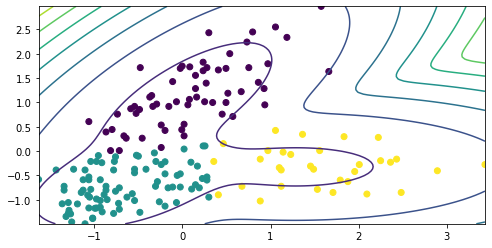

In [35]:
plt.figure(figsize=(8, 4))

x = np.linspace(X_std[:, 0].min(), X_std[:, 0].max(), 100)
y = np.linspace(X_std[:, 1].min(), X_std[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model_v.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, lavels=[0.5, 1, 2, 3, 4, 5])
plt.scatter(X_std[:, 0], X_std[:, 1], c=model_v.predict(X_std))

plt.show()

In [36]:
model_v.weights_

array([6.00312006e-03, 3.74548908e-01, 4.17732651e-01, 2.01179625e-01,
       4.86996089e-04, 4.42722609e-05, 4.02475099e-06, 3.65886454e-07,
       3.32624049e-08, 3.02385499e-09])

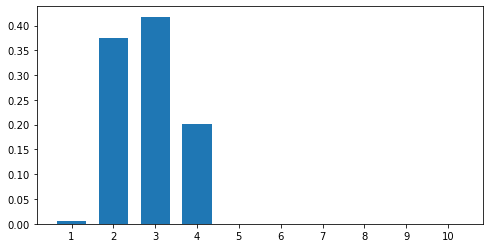

In [37]:
x = np.arange(1, model_v.n_components+1)

plt.figure(figsize=(8, 4))
plt.bar(x, model_v.weights_, width=0.7, tick_label=x)

plt.show()

In [38]:
model_v.predict(X_std)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3])